In [554]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

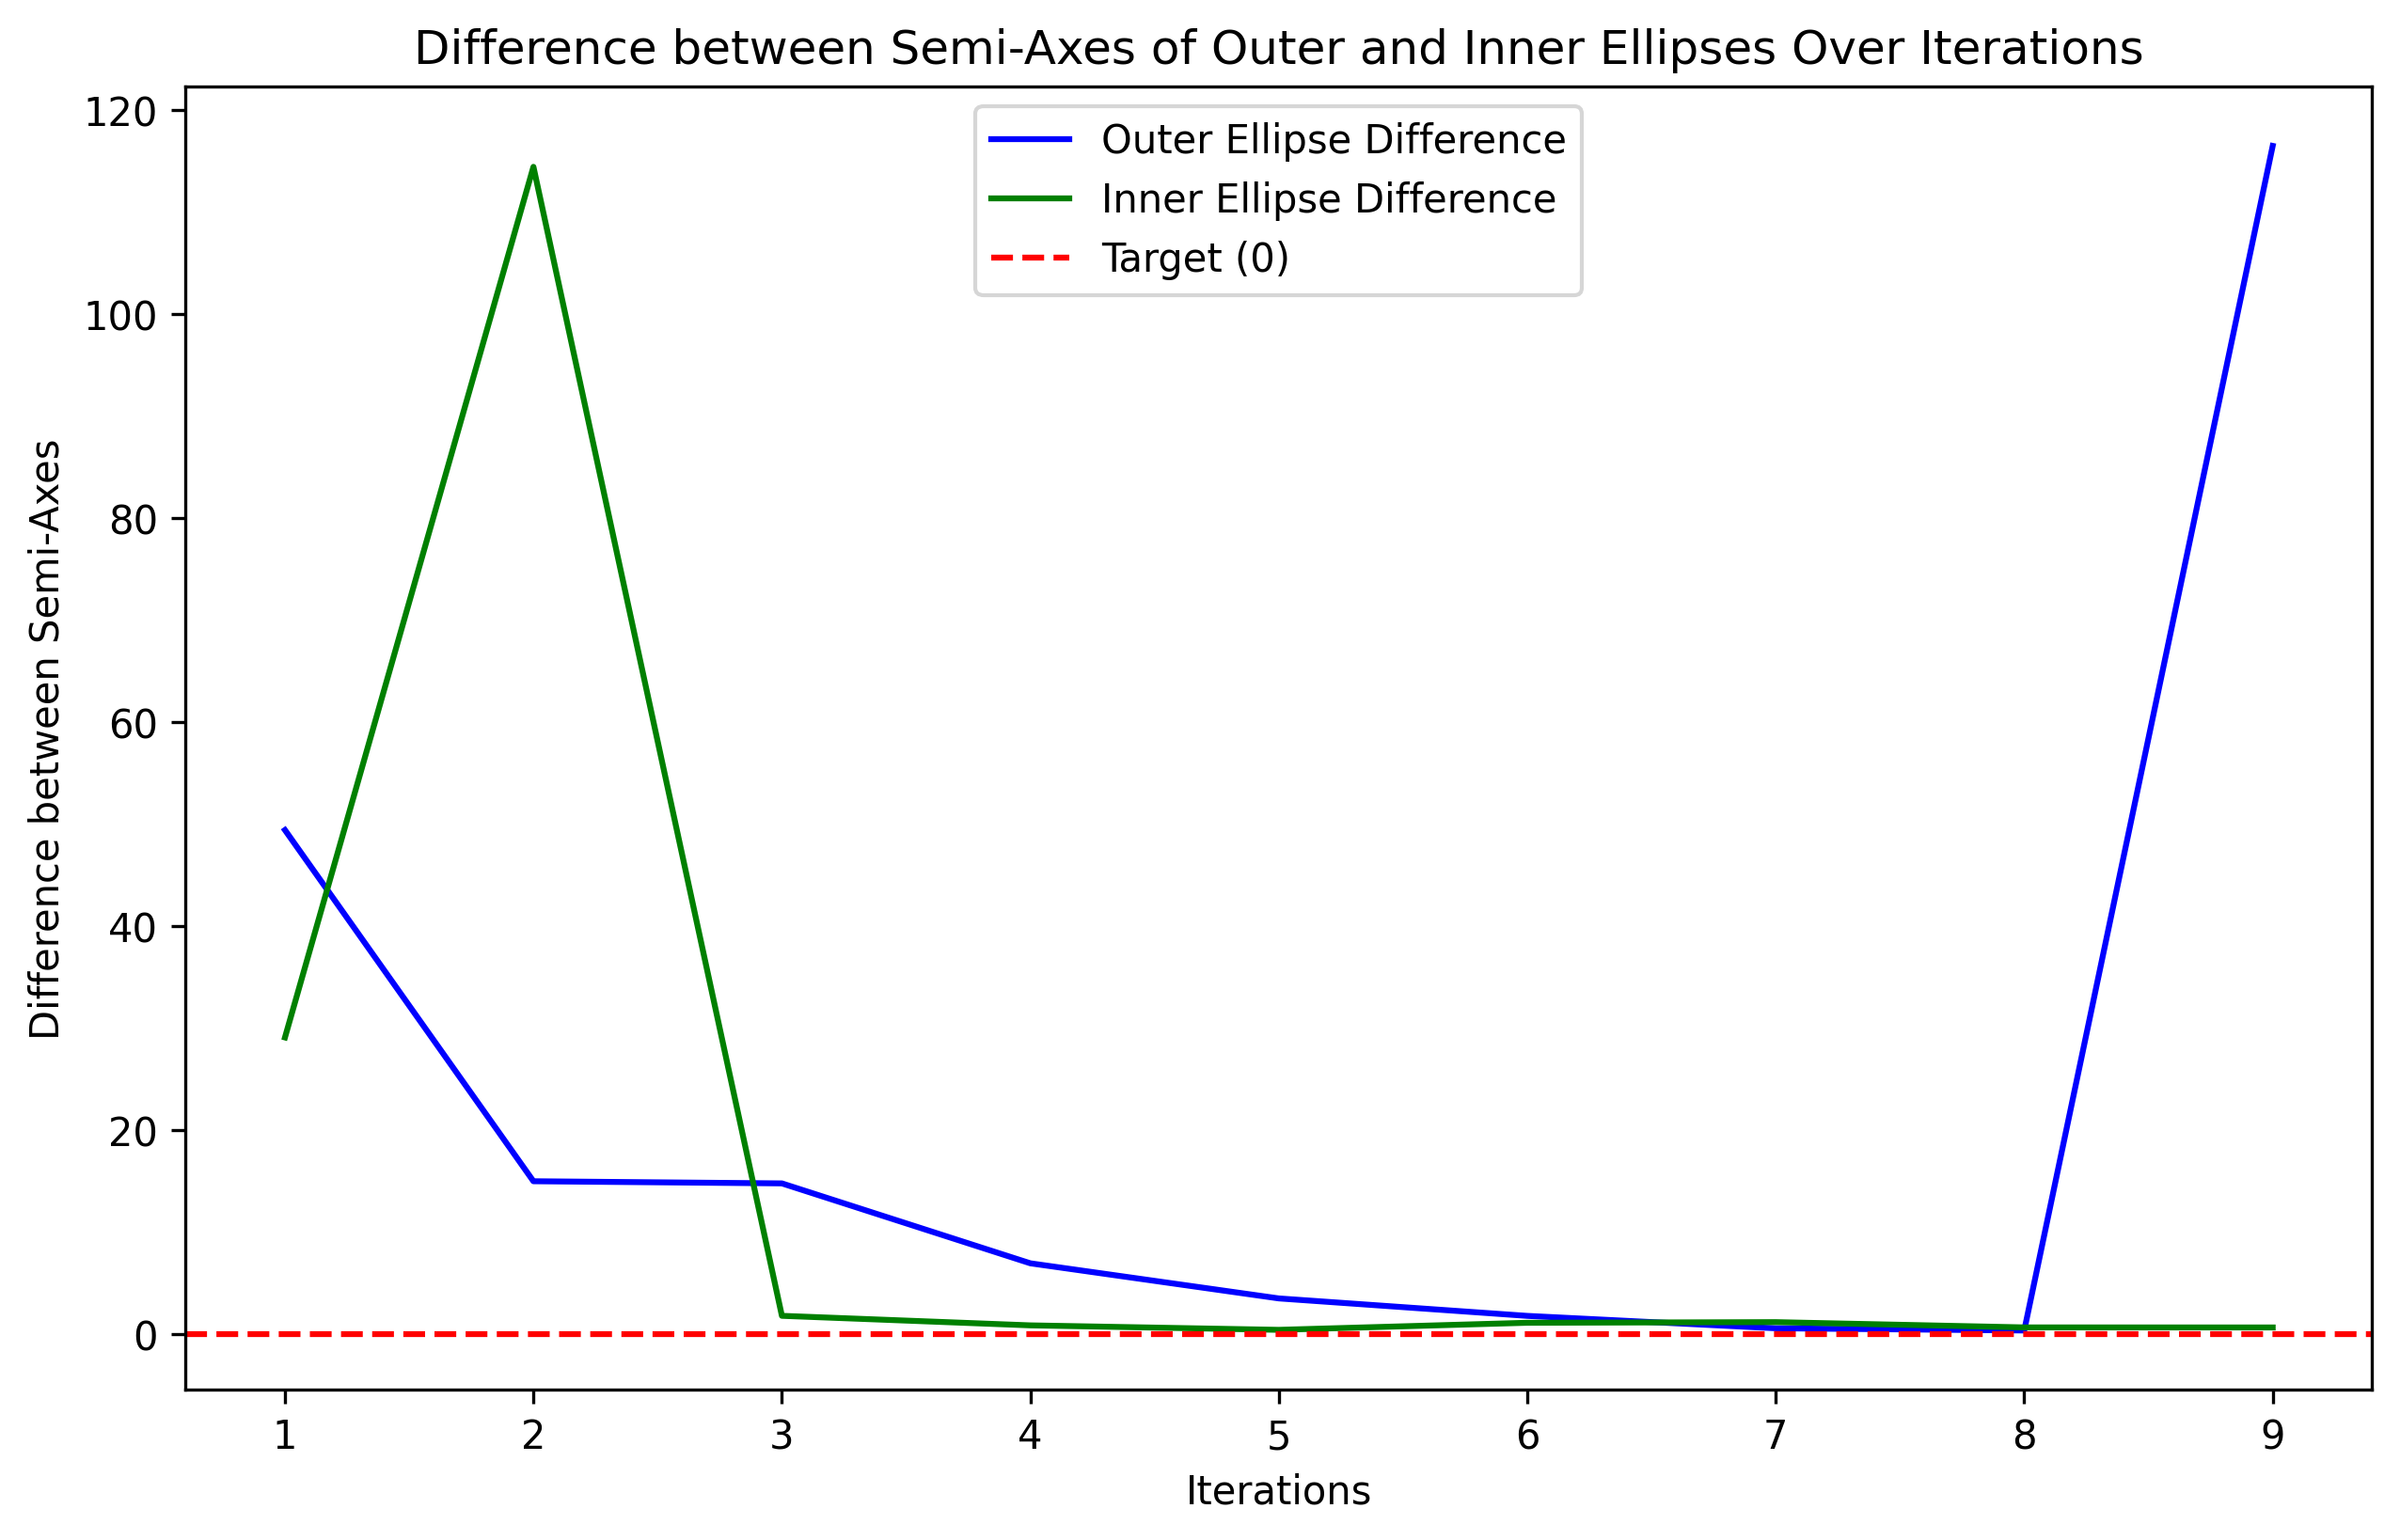

In [555]:
with open('./txt/outer_ellipse_semis.txt', 'r') as f:
    outer_ellipse = [tuple(map(float, line.strip().split(','))) for line in f]
with open('./txt/inner_ellipse_semis.txt', 'r') as f:
    inner_ellipse = [tuple(map(float, line.strip().split(','))) for line in f]

iters = np.arange(1, len(outer_ellipse) + 1)



# Calculate the difference between the major and minor axes for both ellipses
outer_differences = [abs(outer[0] - outer[1]) for outer in outer_ellipse]
inner_differences = [abs(inner[0] - inner[1]) for inner in inner_ellipse]

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(iters, outer_differences, label='Outer Ellipse Difference', color='blue')
plt.plot(iters, inner_differences, label='Inner Ellipse Difference', color='green')
plt.axhline(0, color='red', linestyle='--', label='Target (0)')
plt.xlabel('Iterations')
plt.ylabel('Difference between Semi-Axes')
plt.title('Difference between Semi-Axes of Outer and Inner Ellipses Over Iterations')
plt.legend()
plt.show()

In [556]:
def normalize_list(numbers):
    min_val = min(numbers)
    max_val = max(numbers)
    normalized = [(x - min_val) / (max_val - min_val) for x in numbers]
    return normalized
outer_differences_normalized = normalize_list(outer_differences)
inner_differences_normalized = normalize_list(inner_differences)

In [557]:
outer_differences, inner_differences

([49.417236328125,
  14.982666015625,
  14.772491455078125,
  6.93621826171875,
  3.494384765625,
  1.781890869140625,
  0.567718505859375,
  0.349212646484375,
  116.49370193481445],
 [29.080780029296875,
  114.44149780273438,
  1.788116455078125,
  0.85247802734375,
  0.4140281677246094,
  1.10736083984375,
  1.1688194274902344,
  0.6533126831054688,
  0.6479949951171875])

In [558]:
outer_differences_normalized, inner_differences_normalized

([0.422473971708022,
  0.1259935228852133,
  0.12418392725278414,
  0.056713888498679046,
  0.02707982219744148,
  0.012335309504866901,
  0.0018813278246250374,
  0.0,
  1.0],
 [0.25140215733394417,
  1.0,
  0.0120505023197641,
  0.0038451248723011537,
  0.0,
  0.006080400401222858,
  0.006619380945500539,
  0.0020984813233757144,
  0.002051846174798774])

In [559]:
delta_outer = []
i = 0
while (i+1) < len(outer_differences_normalized):
    (outer_differences_normalized[i+1] - outer_differences_normalized[i])
    delta_outer.append((outer_differences_normalized[i+1] - outer_differences_normalized[i]))
    i += 1

delta_inner = []
i = 0
while (i+1) < len(inner_differences_normalized):
    (inner_differences_normalized[i+1] - inner_differences_normalized[i])
    delta_inner.append((inner_differences_normalized[i+1] - inner_differences_normalized[i]))
    i += 1


In [560]:
delta_outer, delta_inner

([-0.29648044882280866,
  -0.001809595632429148,
  -0.0674700387541051,
  -0.029634066301237567,
  -0.014744512692574579,
  -0.010453981680241864,
  -0.0018813278246250374,
  1.0],
 [0.7485978426660558,
  -0.9879494976802359,
  -0.008205377447462947,
  -0.0038451248723011537,
  0.006080400401222858,
  0.0005389805442776816,
  -0.004520899622124825,
  -4.663514857694041e-05])

In [561]:
all = [x for x in  zip(delta_outer, delta_inner)]

In [562]:
all

[(-0.29648044882280866, 0.7485978426660558),
 (-0.001809595632429148, -0.9879494976802359),
 (-0.0674700387541051, -0.008205377447462947),
 (-0.029634066301237567, -0.0038451248723011537),
 (-0.014744512692574579, 0.006080400401222858),
 (-0.010453981680241864, 0.0005389805442776816),
 (-0.0018813278246250374, -0.004520899622124825),
 (1.0, -4.663514857694041e-05)]

In [547]:
all[1:3]

[(-0.20578963289939547, -0.13001734812308596),
 (-0.037144695071472146, -0.5124305352442234)]

In [531]:
delta_outer[1] - delta_outer[0]

0.5185350703363142

In [532]:
delta_inner[:2]

[-0.29872271436845454, -0.12598816950085923]

In [533]:
all

[(-0.7243421550869974, -0.29872271436845454),
 (-0.20580708475068318, -0.12598816950085923),
 (-0.03613610976125412, -0.5107991283789558),
 (-0.02219980057177838, 0.06233728316290199),
 (-0.007140129880784838, 0.01079580520503981),
 (0.029995093182205446, -0.10714767235404143),
 (-0.02150361621427174, 0.005211686178444946),
 (-0.0059327529298908825, -0.03568708994407573),
 (-0.006933443986544906, 0.21899312577738533),
 (0.008015783860198293, -0.011648199314476693)]

In [497]:
n_iterations = None
for i, tup in enumerate(all):
    print(i)
    if (abs(tup[0]) < 0.01) and (abs(tup[1]) < 0.01):
        n_iterations = i
        break

if n_iterations:
    print(f"The first pair where both numbers are less than {0.01}: {n_iterations}")
else:
    print(f"No pair found where both numbers are less than {0.01}")

0
1
2
3
4
5
6
The first pair where both numbers are less than 0.01: 6


In [470]:
delta_outer, delta_inner

([-0.6936291451317489,
  -0.15714047540080014,
  -0.07606228874223424,
  -0.038245776624634145,
  -0.022660834760754013,
  -0.007333688927704974,
  -0.004927790412123593],
 [-0.7496111999999999,
  -0.13595460000000004,
  -0.0581014,
  -0.0283784,
  -0.011046800000000002,
  -0.0169076,
  0.0011292])

In [161]:
delta_outer, delta_inner

([-0.750212815273008, -0.249787184726992],
 [-0.2812659035321551, -0.7187340964678449])

In [473]:
print(None)

None


In [507]:
size_transform = (1400, 1400)

In [508]:
size_transform = [x*1.5 for x in size_transform]

In [509]:
size_transform

[2100.0, 2100.0]

In [550]:
np.linspace(0.05, 0.15, 5)

array([0.05 , 0.075, 0.1  , 0.125, 0.15 ])

In [552]:
tup = (3,4)
tuple([x*1.5 for x in tup])

(4.5, 6.0)